<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Общий-обзор-данных" data-toc-modified-id="Общий-обзор-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обработка данных</a></span><ul class="toc-item"><li><span><a href="#Приведение-названий-к-нижнему-регистру" data-toc-modified-id="Приведение-названий-к-нижнему-регистру-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Приведение названий к нижнему регистру</a></span></li><li><span><a href="#Заполнение-пропущенных-полей" data-toc-modified-id="Заполнение-пропущенных-полей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Заполнение пропущенных полей</a></span><ul class="toc-item"><li><span><a href="#Поле-name" data-toc-modified-id="Поле-name-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Поле name</a></span></li><li><span><a href="#Поле-year_of_release" data-toc-modified-id="Поле-year_of_release-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Поле year_of_release</a></span></li><li><span><a href="#Поле-critic_score" data-toc-modified-id="Поле-critic_score-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Поле critic_score</a></span></li><li><span><a href="#Разбор-аббревиатуру-'tbd'-в-столбцах-с-рейтингом." data-toc-modified-id="Разбор-аббревиатуру-'tbd'-в-столбцах-с-рейтингом.-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Разбор аббревиатуру 'tbd' в столбцах с рейтингом.</a></span></li><li><span><a href="#Поле-rating" data-toc-modified-id="Поле-rating-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Поле rating</a></span></li></ul></li><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Расчет-суммарных-продаж-во-всех-регионах" data-toc-modified-id="Расчет-суммарных-продаж-во-всех-регионах-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Расчет суммарных продаж во всех регионах</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Cколько-игр-выпускалось-в-разные-годы." data-toc-modified-id="Cколько-игр-выпускалось-в-разные-годы.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Cколько игр выпускалось в разные годы.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-продаж-на-разных-платформах" data-toc-modified-id="Анализ-продаж-на-разных-платформах-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Анализ продаж на разных платформах</a></span><ul class="toc-item"><li><span><a href="#Определение-актуального-срока-жизни-платформы" data-toc-modified-id="Определение-актуального-срока-жизни-платформы-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Определение актуального срока жизни платформы</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li></ul></div>

# Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Подключение библиотек 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Общий обзор данных

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Столбцы имеющие пропущенные значения:
- Name
- Year_of_Release
- Genre
- Critic_Score
- User_Score
- Rating

Не верный тип у следующих полей:
- Year_of_Release - int или date
- User_Score - float

Название столбцов необходимо привести к нижнему регистру 

##  Обработка данных

### Приведение названий к нижнему регистру 

In [5]:
data = data.rename(columns={
    'Name' : 'name', 
    'Platform' : 'platform',
    'Year_of_Release' : 'year_of_release',
    'Genre' : 'genre',
    'NA_sales' : 'na_sales',
    'EU_sales' : 'eu_sales',
    'JP_sales' : 'jp_sales',
    'Other_sales' : 'other_sales',
    'Critic_Score' : 'critic_score',
    'User_Score' : 'user_score',
    'Rating' : 'rating'
})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Заполнение пропущенных полей

#### Поле name

In [7]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих двух записях пропущено много столбцов, поэтому исключим их из рассмотрения. 

In [8]:
data.drop(data[data['name'].isna()].index, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Поле year_of_release

In [10]:
data['year_of_release'].isna().sum()

269

In [11]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [12]:
data[data['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [13]:
data[data['name'] == 'FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Видно, что одни и те же игры выходят на разных платформах в один и тот же год

In [14]:
data['year_of_release'].fillna(
    data.groupby('name')['year_of_release'].transform('median'), 
    inplace=True
)

In [15]:
data['year_of_release'].isna().sum()

146

In [16]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T


Видно, что некоторые игры в названиях содержат год, а судя по играм «Madden NFL 2004» и «FIFA Soccer 2004», год в названии ставятся на единицу больше года выпуска игры.

In [17]:
tmp = data[data['year_of_release'].isna()]['name'].str.extract(r'\s+(\d{4})\s*$').astype('float') - 1

In [18]:
data.loc[data['year_of_release'].isna(), 'year_of_release'] = tmp[0]

In [19]:
data[data['name'] == 'wwe Smackdown vs. Raw 2006']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN


In [20]:
data['year_of_release'].isna().sum()

139

In [21]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.0,0.10,NaN,NaN,NaN


Понятно, что игры для PS выходили раньше чем для PS2 и PS3, учитывая это заполним остатки данных. 

In [22]:
data['year_of_release'].fillna(
    data.groupby('platform')['year_of_release'].transform('median'), 
    inplace=True
)

In [23]:
data['year_of_release'].isna().sum()

0

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Поле critic_score

In [25]:
def present(data_len, len_to_percent):
    return 100/ (data_len / len_to_percent)

In [26]:
len(data[data['critic_score'].isna()])

8576

In [27]:
len(data[data['user_score'].isna() & data['critic_score'].isna() & data['rating'].isna()])

6619

In [28]:
present(len(data), len(data[data['user_score'].isna() & data['critic_score'].isna() & data['rating'].isna()]))

39.60390115478968

In [29]:
data[data['user_score'].isna() & data['critic_score'].isna() & data['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [30]:
data[data['name'] == 'FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Видно, что у игр на разных платформах оценки критиков примерно равны, воспользуемся этим фактом 

In [31]:
data['name'] = data['name'].str.lower()
data['name'] = data['name'].str.strip()

In [32]:
data['critic_score'].fillna(
    data.groupby('name')['critic_score'].transform('first'), 
    inplace=True
)

In [33]:
len(data[data['critic_score'].isna()])

7615

In [34]:
data[data['user_score'].isna() & data['critic_score'].isna() & data['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


У этих игр пропущено много полей, но видно что половина из них — это игры одной серии. Например, Super Mario Bros, Super Mario Bros, Super Mario World или серия Pokemon. Попытки провести лемматизацию не дали результата. Оставим эти записи пустыми.

In [35]:
len(data[data['user_score'].isna() & data['critic_score'].isna() & data['rating'].isna()])

6284

Путем изучения интернет источников, было выяснено, что оценки пользователей на разных платформах могут существенно отличаться. Оценки критиков и игроков могут отличаться в разы, руководствуясь всем этим, оставим все поля оценок пустыми. Влияние оценок на прибыль будет выяснено позднее.

#### Разбор аббревиатуру 'tbd' в столбцах с рейтингом.

Аббревиатура 'tbd' в столбцах с рейтингом расшифровывается как to be determined, а переводится на русский язык следующим образом — будет определено позже. По сути мы не знаем какие оцени поставят пользователи, заменим эти значения на Nan

In [36]:
len(data.query('user_score == "tbd"')['user_score'])

2424

In [37]:
len(data.query('critic_score == "tbd"')['critic_score'])

0

In [38]:
data['user_score'] = data['user_score'].replace({'tbd': np.nan})

In [39]:
len(data.query('user_score == "tbd"')['user_score'])

0

#### Поле rating

In [40]:
len(data[data['rating'].isna()])

6764

У игр с одинаковых название одинаковый возрастной рейтинг, воспользуемся этим фактом.

In [41]:
data['rating'].fillna(
    data.groupby('name')['rating'].transform('first'), 
    inplace=True
)

In [42]:
len(data[data['rating'].isna()])

6327

In [43]:
data[data['rating'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [44]:
data[data['rating'].isna()]['year_of_release'].describe()

count    6327.000000
mean     2004.712739
std         7.535622
min      1980.000000
25%      1999.000000
50%      2007.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

In [45]:
data[data['rating'].notna()]['year_of_release'].describe()

count    10386.000000
mean      2007.540872
std          4.278839
min       1980.000000
25%       2004.000000
50%       2008.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Оставим это поля пустым, нам нечем руководствоваться для его заполнения. Видно, что у старых игр оно заполнено реже, скорее всего раньше не было жесткого контроля игр. Кроме того, возможно оно не являлась обязательным для заполнения там, от куда взяты данные.

### Замена типов данных 

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           10386 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [47]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [48]:
data['user_score'] = data['user_score'].astype('float')

Переведем оценки критиков и пользователей в одну шкалу

In [49]:
data['user_score'] = data['user_score'] * 10

### Расчет суммарных продаж во всех регионах

In [50]:
data['profit'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы.

In [51]:
games_by_years = data.groupby('year_of_release').agg('size').reset_index(name="count")

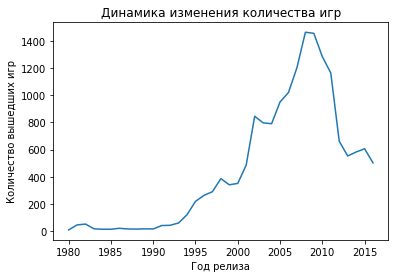

In [52]:
fig = sns.lineplot(x=games_by_years['year_of_release'], y=games_by_years['count'])
plt.xlabel('Год релиза')
plt.ylabel('Количество вышедших игр')
plt.title('Динамика изменения количества игр')
plt.show(fig)

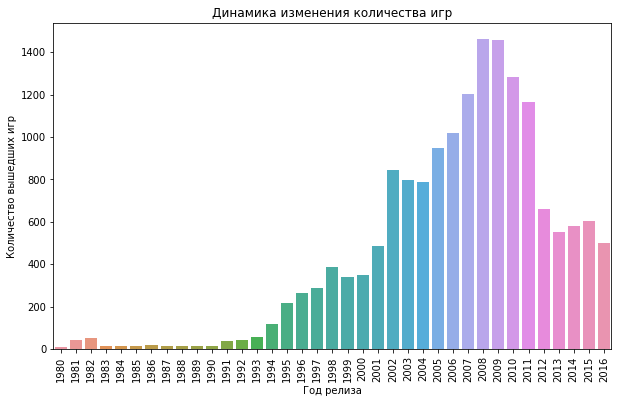

In [53]:
fig , ax = plt.subplots(figsize=(10,6))
sns.barplot(x=games_by_years['year_of_release'], y=games_by_years['count'])

plt.xticks(rotation='vertical')

plt.xlabel('Год релиза')
plt.ylabel('Количество вышедших игр')
plt.title('Динамика изменения количества игр')

plt.show(fig)

#### Вывод

На графике видно, что количество выпущенных игры практически не менялось с 80-ог по 90-е годы. Затем начался бурный рост до 2008 года, а дальше такой же бурный спад. Данные за весь период важны, они позволяют сделать предположения о том, что игровая индустрия была наиболее востребована в период с 2007 по 2011 годы. Скорее всего, наиболее успешные игры и платформы лежат именно в этом промежутки времени. 

### Анализ продаж на разных платформах 

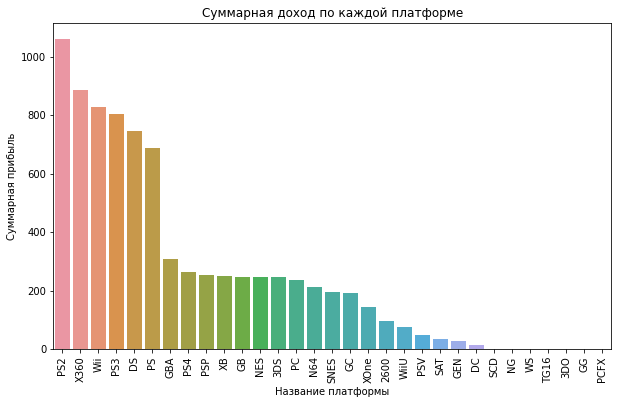

In [54]:
fig , ax = plt.subplots(figsize=(10,6))

result = data.groupby('platform')['profit'].sum().reset_index(name='profit').sort_values('profit',ascending=False)


sns.barplot(x=result['platform'], y=result['profit'])

plt.xticks(rotation='vertical')

plt.xlabel('Название платформы')
plt.ylabel('Суммарная прибыль')
plt.title('Суммарная доход по каждой платформе')

plt.show(fig)

Самыми прибыльными являются следующие платформы:
- PS2
- X360
- Wii
- PS3
- DS
- PS

Остальные платформы менее прибыльны и рассматриваться не будут 

#### Определение актуального срока жизни платформы

In [55]:
popular_platforms = data.query('platform == "PS2" or platform =="X360" or platform == "Wii" or platform == "PS3" or platform == "DS" or platform == "PS"')

In [56]:
popular_platforms = popular_platforms.pivot_table(
    index=['platform','year_of_release'], 
    values='profit', 
    aggfunc='sum'
).reset_index()

In [57]:
popular_platforms.head()

,platform,year_of_release,profit
0,DS,1985,0.02
1,DS,2004,15.91
2,DS,2005,119.34
3,DS,2006,111.64
4,DS,2007,136.12


Text(0.5, 1.0, 'Суммарный годовой доход по каждой платформе')

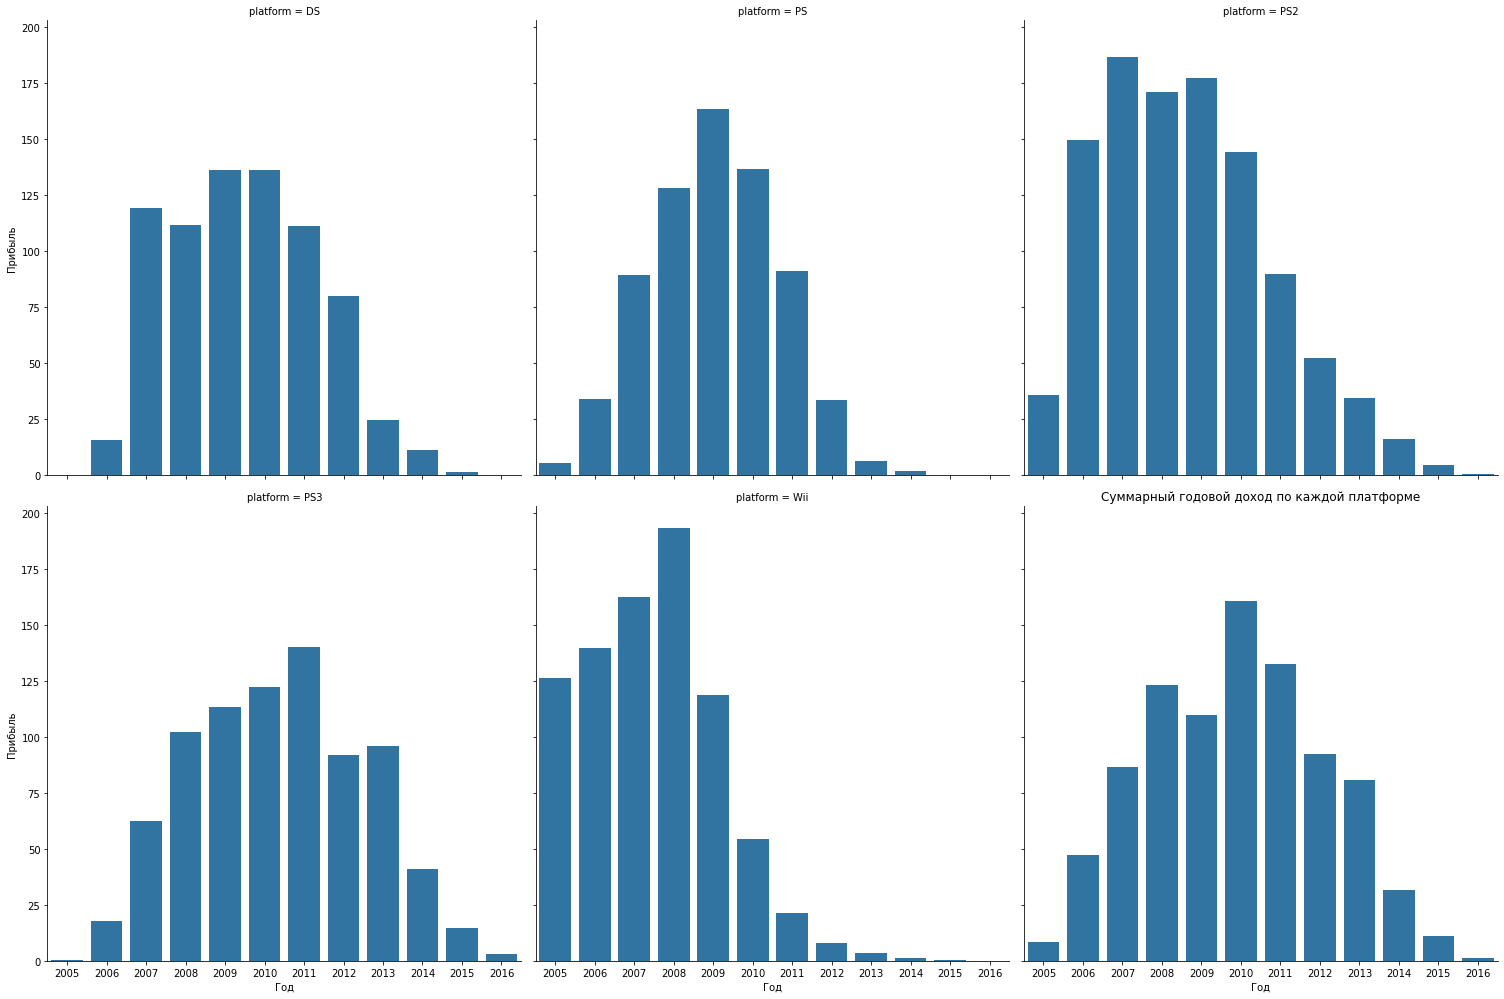

In [58]:
g = sns.FacetGrid(popular_platforms, col="platform", col_wrap=3, height=7)
g.map(sns.barplot, 
      "year_of_release", 
      "profit", 
      order=popular_platforms["year_of_release"].unique().sort()
)
g.set_axis_labels("Год", "Прибыль")

plt.title('Суммарный годовой доход по каждой платформе')

#### Вывод

На графиках видно, что срок жизни платформы составляет в среднем 5 лет. Имеет смысл анализировать данные только за этот период.